# SI 618 Homework 8

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## The data:

* https://www.kaggle.com/terminus7/pokemon-challenge

> This data set contains two files.
> 
> pokemon.csv: 800 Pokemon, including their number, name, first and second type, basic stats: HP, Attack, Defense, Special Attack, Special Defense, the game generation they were introduced in, and whether they had the "legendary" status.
> 
> combats.csv: 50,000 simulated encounters between pairs of pokemon with the first pokemon to act, the other pokemon and the winner 
>
> We will be using only the pokemon.csv data for this homework 


### Q1. 10 points
- #### Load the pokemon data and inspect statistical measures of the columns. 
    -  ##### Hint: There is a pandas function which will display all the following values - the count, mean, std, min, max, median etc - of the columns of a dataframe
- #### Calculate the mode for each ability point (HP, Attack, Defense, Sp. Atk, Sp. Def and Speed) in the pokemon data and the number of times each mode occured.  You must not use a loop to do this task.
    - Hint: You can use a function discussed in the class.

In [2]:
pokemon = pd.read_csv('pokemon.csv', index_col=0)
pokemon.describe()

HP      Attack     Defense     Sp. Atk     Sp. Def       Speed  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean    69.258750   79.001250   73.842500   72.820000   71.902500   68.277500   
std     25.534669   32.457366   31.183501   32.722294   27.828916   29.060474   
min      1.000000    5.000000    5.000000   10.000000   20.000000    5.000000   
25%     50.000000   55.000000   50.000000   49.750000   50.000000   45.000000   
50%     65.000000   75.000000   70.000000   65.000000   70.000000   65.000000   
75%     80.000000  100.000000   90.000000   95.000000   90.000000   90.000000   
max    255.000000  190.000000  230.000000  194.000000  230.000000  180.000000   

       Generation  
count   800.00000  
mean      3.32375  
std       1.66129  
min       1.00000  
25%       2.00000  
50%       3.00000  
75%       5.00000  
max       6.00000

In [3]:
from scipy import stats

cols_mode = stats.mode(pokemon[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]], keepdims = True)

pd.DataFrame([cols_mode[0][0], cols_mode[1][0]], columns = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]).rename(index = {0:"mode", 1: "count"}) 


HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
mode   60     100       70       60       80     50
count  67      40       54       51       52     46

### Q2 - 15 Points
1. #### Plot the pairs of different ability points (HP, Attack, Defence, Sp. Atk, Sp. Def and Speed)
2. #### Which abilities are the most and least correlated?

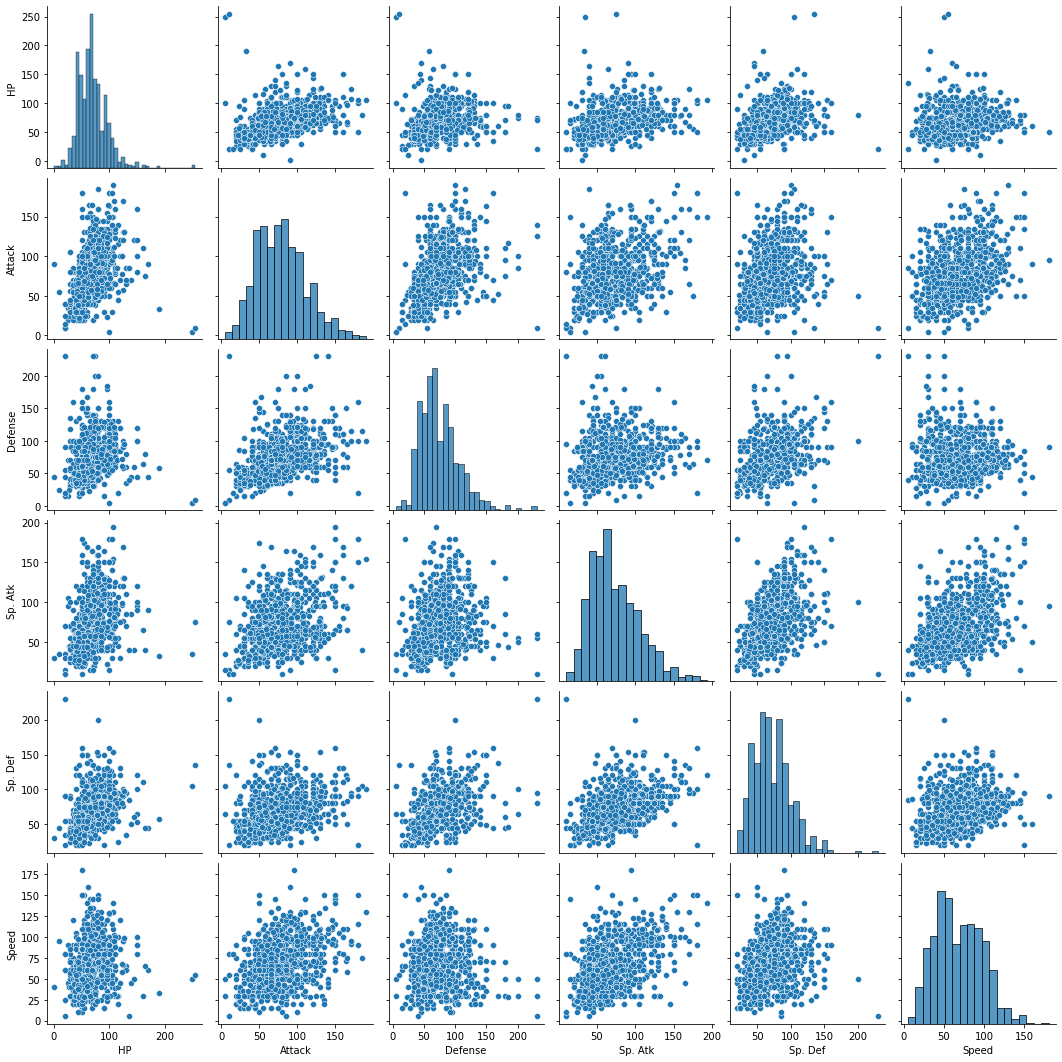

In [4]:
# 1

sns.pairplot(pokemon, vars=["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"])

 \# 2 
 
According to plots above, we can find that:

- The abilities `Sp. Atk` and `Sp. Def` are the most correlated.
- The abilities `Defense` and `Speed` are the least correlated.

### Q3 - 20 points
- ####  Use a hexbin plot using seaborn to visualize the relationship between 
    - #### Attack and Defense
    - #### Sp. Atk and Sp. Def
- #### Do these plots help you find any extra insights that cannot be obtained from the pairplots from Q2? 
- #### Review the Cairo's wheel concept from last week's lecture and state 2 axes from Cairo's wheel on whose ends these visualizations would score highly. Elaborate why.

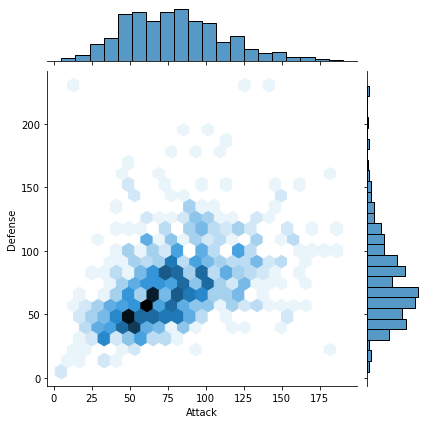

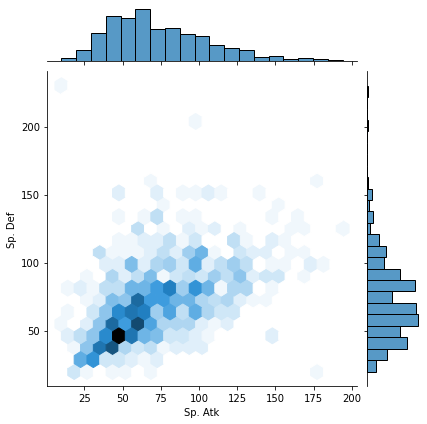

In [5]:
sns.jointplot(x='Attack',y='Defense',data=pokemon,kind="hex")
sns.jointplot(x='Sp. Atk',y='Sp. Def',data=pokemon,kind="hex")

- Compared with the pairplots, hexbin plots can clearly present a large number of potentially overlapping scatter points, so we can know where the data points are concentrated and the likely distribution. From the hexbin plots above, we can find the potential distribution of variables, which cannot be obtained from the pairplots from Q2.


- From Cairo's wheel, we can find that
    1. In the aspect of "Lightness", these visualizations would score highly. Compared with scatter plots, hexbin plots merges closely located data points into one hexagon. Therefore, visually, the density of data is lower, making it more intelligible for viewers.
    2. In the aspect of "Functionality", these visualizations would score highly. Besides the potential relationship between variables, these visualizations also provide information about the distribution of variable data. They use minimal components to completely describe the data. Thus, these visualizations are relatively deeper and more comprehensive.
    3. In the aspect of "Familarity", these visualizations would score highly. The hexbin plots and distribution plots are familar for most people. Without original designed icons or signals, these visualizations are more intelligible for viewers.

### Q4 - 15 points

1. #### Use an appropriate plot to check for outliers for the different ability points 
2. #### Calculate the total ability points (sum of all ability points) and use an appropriate plot to check for outliers. 
3. #### Do you notice anything different in the plots for the individual ability points and the total ability points. What do you think is the reason here?

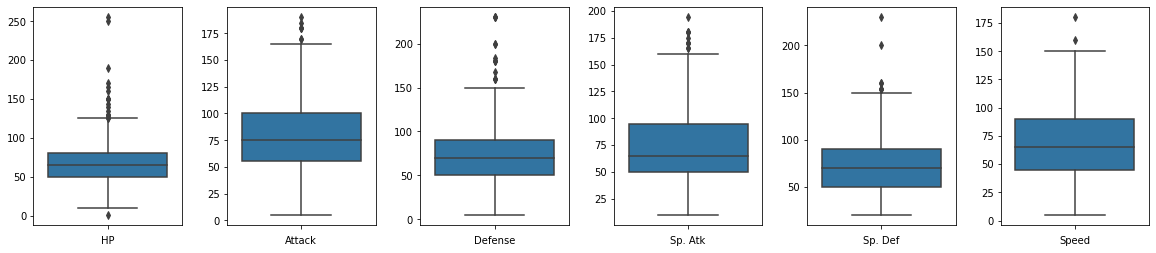

In [6]:
# 1

ability_list = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

plt.figure(figsize=(20,4))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(len(ability_list)):
    plt.subplot(1,6,i+1)
    ax = sns.boxplot(y = pokemon[ability_list[i]])
    ax.set_xlabel(ability_list[i])
    ax.set_ylabel("")


Text(0, 0.5, '')

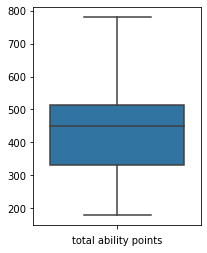

In [7]:
# 2 

pokemon["total"] = pokemon["HP"]+pokemon["Attack"]+pokemon["Defense"]+pokemon["Sp. Atk"]+pokemon["Sp. Def"]+pokemon["Speed"]

plt.figure(figsize=(3,4))
ax = sns.boxplot(y = pokemon["total"])
ax.set_xlabel("total ability points")
ax.set_ylabel("")


\# 3

From the plots for the individual ability points and the total ability points, we can find that:

- For each of the individual ability points, there exist outliers. Besides, most of the outliers have high individual ability points
- For the total ability points, there is no outliers in the plot.

The reason may be that the pokemon with one higher individual ability points (such as "Attack") may have other lower individual ability points (such as "Defense"). Thus, when they sum up to total ability points, they cancel each other out. So we can find total ability points between 180 and 780, with no outliers.

### Q5 - 15 points
1. #### Visualize the distribution of the total ability points using a histogram with a kernel density estimator.Based on some of the distributions discussed in class, which distribution does this resemble?
2. #### Visualize the same using a log transformation of the values. Do you notice any changes?

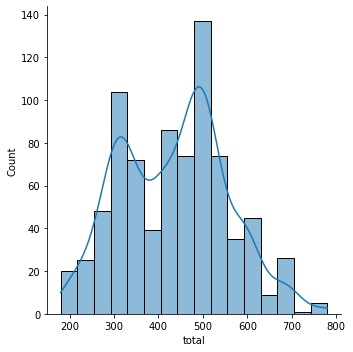

In [8]:
# 1

sns.displot(pokemon["total"],  kde=True) 

From the plot above, we can find that this distribution is similar to **Bimodal distribution**.

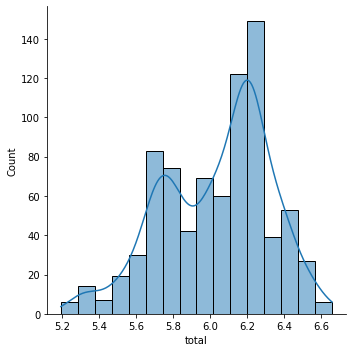

In [9]:
# 2

sns.displot(np.log(pokemon["total"]), kde=True) 

From the plot above, we can find that this distribution still resembles a bimodal distribution, but it has a higher right peak than before the log transformation. If we set the bin number smaller, this distribution will now resemble a skewed normal distribution.

### Q6 - 10 points

#### Please answer this question without sorting any values

1. #### Which pokemons have total ability points that are higher than 99 percentage of the pokemons, i.e. the top 1% of pokemons according to their total ability points?
2. #### Which pokemons have total ability points that are lower than 99 percentage of the pokemons, i.e. the bottom 1% of pokemons according to their total ability points?



In [10]:
pokemon[pokemon["total"] > np.percentile(pokemon["total"],99)]["Name"]

#
164     Mega Mewtwo X
165     Mega Mewtwo Y
423     Primal Kyogre
425    Primal Groudon
427     Mega Rayquaza
553            Arceus
Name: Name, dtype: object

In [11]:
pokemon[pokemon["total"] < np.percentile(pokemon["total"],1)]["Name"]

#
14      Caterpie
17        Weedle
207      Sunkern
289      Wurmple
304        Ralts
323      Azurill
447    Kricketot
Name: Name, dtype: object

### Q7 - 15 points
- #### Recollecting a technique discussed in class last week, use an appropriate plot to check for a relationship between HP and the total ability points. 
- #### Does including lowess smoothing in this technique result in a better fit for identifying this relationship? Why?


Text(0, 0.5, 'total ability points')

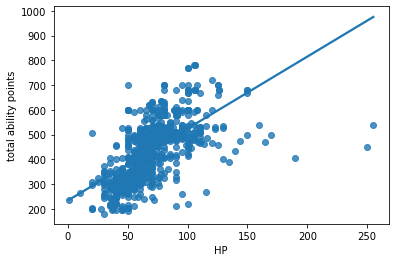

In [12]:
ax = sns.regplot(x='HP',y='total',data=pokemon, ci = 0.2)
ax.set_ylabel("total ability points")

Text(0, 0.5, 'total ability points')

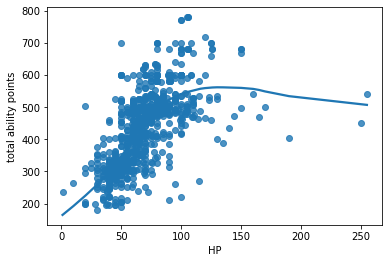

In [13]:
ax = sns.regplot(x='HP',y='total',data=pokemon, ci = 0.2,lowess=True)
ax.set_ylabel("total ability points")

**No**. When HP is larger than 150, the data points are sparse and may be outliers, which cannot represent the relationship between HP and total ability points. However, if lowess smoothing is included, as HP increases to be larger than 150 the calculated smoothed value will approach the value of outliers, which makes the fit worse. In this result, lowess smoothing can lead to overfitting. Therefore, including lowess smoothing in this technique does **not** result in a better fit for identifying this relationship.

### Submission Instructions
- #### Please turn in you uniqname_si618_hw8_solution.ipynb and uniqname_si618_hw8_solution.html files through canvas.